In [166]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

### Loading the data

In [86]:
# Load in the data
ames_df = pd.read_csv("../data/AmesHousing.csv")

In [87]:
# Overall dataset description and summary stats
print(f"The training dataset has {ames_df.shape[0]} data rows and {ames_df.shape[1]} columns")
print()


features = {}
for col in ames_df.columns:
    features[col] = ames_df[col].dtype

print("The features and their data types in the dataset are: ", features)

The training dataset has 2930 data rows and 82 columns

The features and their data types in the dataset are:  {'Order': dtype('int64'), 'PID': dtype('int64'), 'MS SubClass': dtype('int64'), 'MS Zoning': dtype('O'), 'Lot Frontage': dtype('float64'), 'Lot Area': dtype('int64'), 'Street': dtype('O'), 'Alley': dtype('O'), 'Lot Shape': dtype('O'), 'Land Contour': dtype('O'), 'Utilities': dtype('O'), 'Lot Config': dtype('O'), 'Land Slope': dtype('O'), 'Neighborhood': dtype('O'), 'Condition 1': dtype('O'), 'Condition 2': dtype('O'), 'Bldg Type': dtype('O'), 'House Style': dtype('O'), 'Overall Qual': dtype('int64'), 'Overall Cond': dtype('int64'), 'Year Built': dtype('int64'), 'Year Remod/Add': dtype('int64'), 'Roof Style': dtype('O'), 'Roof Matl': dtype('O'), 'Exterior 1st': dtype('O'), 'Exterior 2nd': dtype('O'), 'Mas Vnr Type': dtype('O'), 'Mas Vnr Area': dtype('float64'), 'Exter Qual': dtype('O'), 'Exter Cond': dtype('O'), 'Foundation': dtype('O'), 'Bsmt Qual': dtype('O'), 'Bsmt Cond': dt

In [88]:
# Explore the dataset and summary stats
ames_df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1

In [89]:
pd.options.display.max_columns = 999
ames_df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Dealing with Missing Value

In [90]:
# Check to see which columns have missing values
df_missing = ames_df[ames_df.columns[ames_df.isnull().any()].tolist()]
print(f"There are total {df_missing.shape[1]} features with missing values as follows: \n {df_missing.columns.values}")

There are total 27 features with missing values as follows: 
 ['Lot Frontage' 'Alley' 'Mas Vnr Type' 'Mas Vnr Area' 'Bsmt Qual'
 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
 'BsmtFin Type 2' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF'
 'Electrical' 'Bsmt Full Bath' 'Bsmt Half Bath' 'Fireplace Qu'
 'Garage Type' 'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area'
 'Garage Qual' 'Garage Cond' 'Pool QC' 'Fence' 'Misc Feature']


In [91]:
# Getting the percentage of missing data for each feature
df_missing_stats = pd.DataFrame((df_missing.isna().sum()/ames_df.shape[0]*100).round(2).sort_values(ascending=False), columns=["Missing_Percentage"])
df_missing_stats['Dtypes'] = [ames_df[colname].dtype for colname in df_missing_stats.index]
df_missing_stats

,Missing_Percentage,Dtypes
Pool QC,99.56,object
Misc Feature,96.38,object
Alley,93.24,object
Fence,80.48,object
Fireplace Qu,48.53,object
Lot Frontage,16.72,float64
Garage Cond,5.43,object
Garage Qual,5.43,object
Garage Finish,5.43,object
Garage Yr Blt,5.43,float64


In [93]:
# Drop columns with more than 20% of the data is missing
ames_df = ames_df.drop(df_missing_stats[df_missing_stats["Missing_Percentage"] > 20].index.to_list(), axis="columns")

In [94]:
# Drop rows with any NA values or in "SalePrice" column
ames_df = ames_df.dropna()

In [96]:
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


### Combining time of sale with Zillow Data

The transaction data in Ames includes the years from 2006-2010, but the Zillow data only starts from 2009. Therefore, we going to approximate Ames by using a nearby city Des Moines, the capital of Iowa, which has Zillow data running back from 2000.

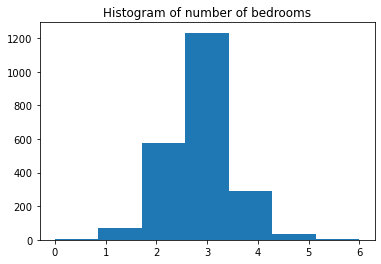

In [150]:
# Visualizing distribution of number of bedrooms
plt.hist(ames_df["Bedroom AbvGr"], bins = len(ames_df["Bedroom AbvGr"].unique()))
plt.title("Histogram of number of bedrooms")
plt.show()

In [151]:
# Year Sold in the Ames data
ames_df["Yr Sold"].value_counts()

2007    530
2006    484
2009    482
2008    459
2010    263
Name: Yr Sold, dtype: int64

In [154]:
zillow_df = pd.read_csv("../data/city_zhvi_{bedroom}bd_month.csv".format(bedroom=3))

In [155]:
zillow_df = zillow_df[(zillow_df["RegionName"] == "Des Moines") & (zillow_df["State"] == "IA")]
zillow_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
128,17759,128,Des Moines,city,IA,IA,"Des Moines-West Des Moines, IA",Polk County,88851.48654,89102.724041,89356.390367,89872.79946,90449.214592,91009.409652,91533.701157,91997.965835,92483.164983,93130.100548,93737.152986,94300.686259,94533.461613,94707.074628,94893.409621,95318.797706,95847.736775,96373.254985,96887.441168,97343.134179,97829.12479,98222.60166,98647.704204,99070.440929,99263.589822,99329.976972,99331.308477,99809.907991,100552.594898,101485.071518,102151.922617,102702.663041,103192.449628,103788.148505,104430.64862,105062.080126,105630.235625,106136.260805,106624.316413,107115.969475,107599.516681,108046.788467,108551.421545,109248.019329,109997.782171,110643.701699,111170.395865,111642.484365,112066.110915,112351.129499,112443.359279,112652.058676,112927.717185,113374.949954,113811.426572,114238.56512,114685.744653,115129.51979,115574.120

In [176]:
# Create new columns
new_cols = ["ZHVI Month T", "ZHVI Month T-1", "ZHVI Month T-2", "ZHVI Month T-3", "ZHVI Month T-4", "ZHVI Month T-5"]
for col in new_cols:
    ames_df[col] = np.nan

In [177]:
ames_df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,ZHVI Month T,ZHVI Month T-1,ZHVI Month T-2,ZHVI Month T-3,ZHVI Month T-4,ZHVI Month T-5
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000,NaN,NaN,NaN,NaN,NaN,NaN
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000,NaN,NaN,NaN,NaN,NaN,NaN
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000,NaN,NaN,NaN,NaN,NaN,NaN
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2924,923250060,20,RL,80.0,17400,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1977,1977,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,936.0,Unf,0.0,190.0,1126.0,GasA,Fa,Y,SBrkr,1126,0,0,1126,1.0,0.0,2,0,3,1,TA,5,Typ,1,Attchd,1977.0,RFn,2.0,484.0,TA,TA,P,295,41,0,0,0,0,0,5,2006,WD,Normal,160000,NaN,NaN,NaN,NaN,NaN,NaN
2924,2925,923251180,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,131000,NaN,NaN,NaN,NaN,NaN,NaN
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,A

In [170]:
ames_df[ames_df["Bedroom AbvGr"] == 1]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
17,18,527258010,20,RL,88.0,11394,Pave,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1856,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Attchd,2010.0,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,0,6,2010,New,Partial,394432
104,105,533238045,20,FV,57.0,12853,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2010,2010,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Ex,Po,No,GLQ,1032.0,Unf,0.0,610.0,1642.0,GasA,Ex,Y,SBrkr,1418,0,0,1418,1.0,0.0,1,1,1,1,Gd,6,Typ,1,Attchd,2010.0,RFn,3.0,852.0,TA,TA,Y,160,192,0,224,0,0,0,4,2010,New,Partial,267916
106,107,533253060,120,RL,30.0,4420,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Greens,Norm,Norm,TwnhsE,1Story,8,5,1980,1980,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,728.0,Unf,0.0,0.0,728.0,GasA,TA,Y,SBrkr,788,0,0,788,1.0,0.0,1,0,1,1,Gd,3,Typ,1,Detchd,1980.0,Fin,2.0,484.0,TA,TA,Y,133,42,0,0,0,0,0,6,2010,WD,Normal,155000
107,108,533253210,120,RL,40.0,3880,Pave,IR1,Lvl,AllPub,Inside,Gtl,Greens,Norm,Norm,Twnhs,1Story,8,6,1978,1978,Gable,CompShg,Wd Sdng,Plywood,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1052.0,Unf,0.0,174.0,1226.0,GasA,TA,Y,SBrkr,1226,0,0,1226,1.0,0.0,1,0,1,1,Gd,4,Typ,1,Attchd,1978.0,Fin,2.0,484.0,TA,TA,Y,223,78,0,0,0,0,0,1,2010,WD,Normal,206000
241,242,905453080,20,RL,44.0,17485,Pave,IR2,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,7,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,96.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1346.0,Unf,0.0,162.0,1508.0,GasA,Ex,Y,SBrkr,1508,0,0,1508,1.0,0.0,1,0,1,1,Gd,5,Typ,2,Attchd,2009.0,RFn,2.0,572.0,TA,TA,Y,0,0,0,0,0,0,0,1,2010,Con,Partial,308030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,2727,905202210,20,RL,87.0,13050,Pave,Reg,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,5,6,1963,1963,Flat,Tar&Grv,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,Gd,TA,Av,Rec,104.0,ALQ,850.0,46.0,1000.0,GasA,Ex,Y,SBrkr,1000,0,0,1000,1.0,0.0,1,0,1,1,TA,4,Typ,2,Attchd,1993.0,Unf,2.0,575.0,TA,TA,Y,238,0,148,0,0,0,0,4,2006,WD,Normal,164000
2802,2803,907290160,120,RM,37.0,4435,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,170.0,Gd,TA,PConc,Gd,TA,Av,GLQ,717.0,Unf,0.0,131.0,848.0,GasA,Ex,Y,SBrkr,848,0,0,848,1.0,0.0,1,0,1,1,Gd,4,Typ,0,Attchd,2003.0,Fin,2.0,420.0,TA,TA,Y,140,0,0,0,0,0,0,4,2006,WD,Normal,133000
2803,2804,907290230,120,RM,37.0,4435,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,169.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,662.0,Unf,0.0,186.0,848.0,GasA,Ex,Y,SBrkr,848,0,0,848,1.0,0.0,1,0,1,1,Gd,3,Typ,1,Attchd,2004.0,RFn,2.0,420.0,TA,TA,Y,140,0,0,0,0,0,0,5,2006,WD,Normal,155900
2843,2844,909101330,30,RL,60.0,8088,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr

In [168]:
for index, row in ames_df.iterrows():
    input_dt = datetime(row["Yr Sold"], row["Mo Sold"], 1)
    output_dt = input_dt + relativedelta(day=31)
    transaction_date = output_dt.strftime("%Y-%m-%d")
    


2010-05-31
2010-06-30
2010-06-30
2010-04-30
2010-03-31
2010-06-30
2010-04-30
2010-01-31
2010-03-31
2010-06-30
2010-04-30
2010-05-31
2010-02-28
2010-06-30
2010-06-30
2010-06-30
2010-06-30
2010-02-28
2010-01-31
2010-01-31
2010-07-31
2010-04-30
2010-06-30
2010-02-28
2010-03-31
2010-03-31
2010-07-31
2010-06-30
2010-06-30
2010-07-31
2010-01-31
2010-05-31
2010-04-30
2010-06-30
2010-05-31
2010-06-30
2010-02-28
2010-03-31
2010-03-31
2010-06-30
2010-06-30
2010-06-30
2010-02-28
2010-04-30
2010-06-30
2010-01-31
2010-01-31
2010-04-30
2010-06-30
2010-04-30
2010-05-31
2010-01-31
2010-03-31
2010-04-30
2010-04-30
2010-06-30
2010-03-31
2010-04-30
2010-06-30
2010-04-30
2010-05-31
2010-05-31
2010-01-31
2010-04-30
2010-05-31
2010-05-31
2010-04-30
2010-02-28
2010-05-31
2010-04-30
2010-04-30
2010-06-30
2010-04-30
2010-06-30
2010-04-30
2010-06-30
2010-06-30
2010-06-30
2010-03-31
2010-01-31
2010-04-30
2010-06-30
2010-02-28
2010-05-31
2010-05-31
2010-04-30
2010-04-30
2010-06-30
2010-01-31
2010-04-30
2010-03-31